In [ ]:
import pandas as NewsDetPd
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')
News_Detect = NewsDetPd.read_csv("FastTextNews_Covid19.csv")
News_Detect

,FastText_News,Label
0,"['tencent', 'reveal', 'real', 'number', 'death']",0
1,"['take', 'chlorin', 'dioxid', 'help', 'fight',...",0
2,"['video', 'show', 'workmen', 'uncov', 'batinfe...",0
3,"['asterix', 'comic', 'book', 'simpson', 'predi...",0
4,"['chines', 'presid', 'xi', 'jinp', 'visit', 'm...",0
...,...,...
7251,"['global', 'covid', 'prevent', 'trial', 'hydro...",1
7252,"['bavaria', 'free', 'covid', 'test', 'split', ...",1
7253,"['britain', 'lock', 'citi', 'leicest', 'covid'...",1
7254,"['uk', 'impos', 'lockdown', 'citi', 'leicest',...",1


In [ ]:
News_Detect.info()
News_Detect['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FastText_News  7256 non-null   object
 1   Label          7256 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


,count
Label,
1,3792
0,3464


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Label',axis=1)
News_DetectY = News_Detect['Label']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['FastText_News'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 9998)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 FastText News:  (4353, 100)
Validation Covid19 FastText News:  (1451, 100)
Testing Covid19 FastText News:  (1452, 100)


### CNN Model

Note: changing filters as '64' and kernel size as '7', epochs as 100 as common for hypertuning.

3 layers

=============== Performance of CNN 3 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5091 - loss: 0.2485 - val_accuracy: 0.5210 - val_loss: 0.2458
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5878 - loss: 0.2372 - val_accuracy: 0.5975 - val_loss: 0.2371
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6019 - loss: 0.2297 - val_accuracy: 0.5658 - val_loss: 0.2452
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6346 - loss: 0.2217 - val_accuracy: 0.6664 - val_loss: 0.2094
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6531 - loss: 0.2073 - val_accuracy: 0.6423 - val_loss: 0.2134
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6500 - loss: 0.2145 - val_accuracy: 0.6685 - val_loss: 0.2055
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6833 - loss: 0.2027 - val_accuracy: 0.6230 - val_loss: 0.2229
Epoch 8/100
88/88 ━━━━━━━━━

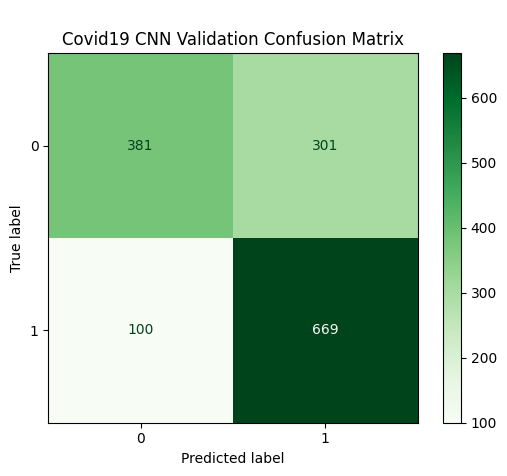

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       670
           1       0.69      0.86      0.77       782

    accuracy                           0.72      1452
   macro avg       0.73      0.71      0.70      1452
weighted avg       0.73      0.72      0.71      1452



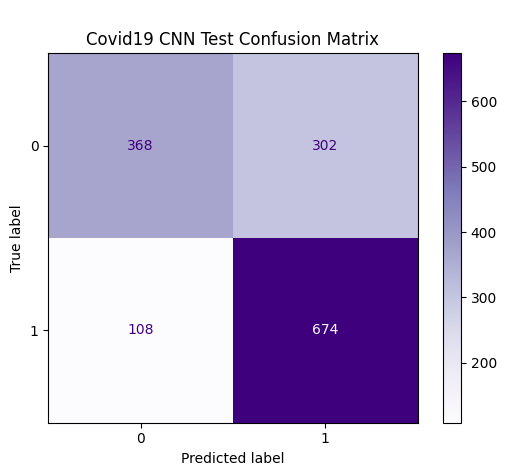

In [ ]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 3 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()


4 layers

=============== Performance of CNN 4 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5477 - loss: 0.2478 - val_accuracy: 0.6210 - val_loss: 0.2268
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6149 - loss: 0.2278 - val_accuracy: 0.6444 - val_loss: 0.2181
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6186 - loss: 0.2273 - val_accuracy: 0.6623 - val_loss: 0.2152
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6512 - loss: 0.2131 - val_accuracy: 0.6685 - val_loss: 0.2061
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6592 - loss: 0.2100 - val_accuracy: 0.6706 - val_loss: 0.2078
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6478 - loss: 0.2096 - val_accuracy: 0.6458 - val_loss: 0.2155
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6727 - loss: 0.2086 - val_accuracy: 0.6175 - val_loss: 0.2329
Epoch 8/100
88/88 ━━━━━━━━━

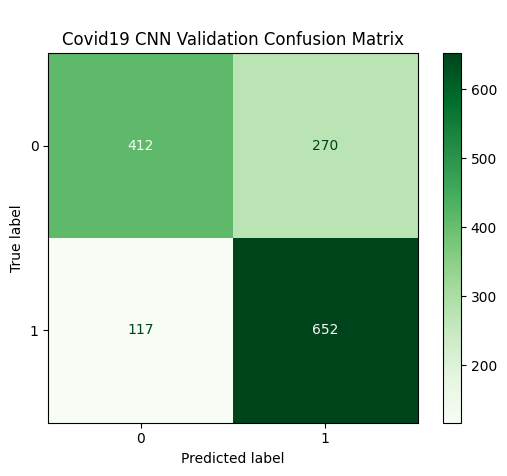

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       670
           1       0.70      0.86      0.77       782

    accuracy                           0.73      1452
   macro avg       0.74      0.71      0.71      1452
weighted avg       0.74      0.73      0.72      1452



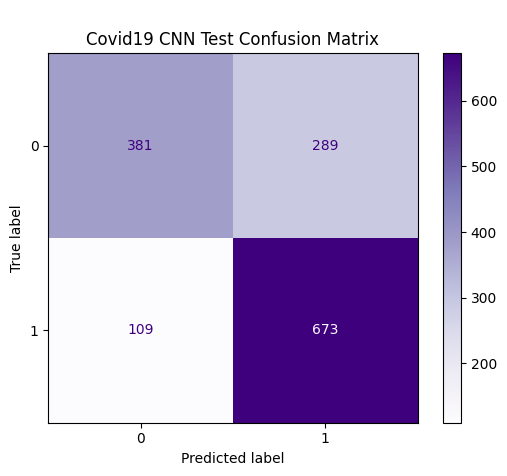

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 4 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

5 layers

=============== Performance of CNN 5 Layers Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5264 - loss: 0.2482 - val_accuracy: 0.6141 - val_loss: 0.2307
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6110 - loss: 0.2313 - val_accuracy: 0.6354 - val_loss: 0.2210
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6337 - loss: 0.2207 - val_accuracy: 0.5472 - val_loss: 0.2562
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6178 - loss: 0.2302 - val_accuracy: 0.6327 - val_loss: 0.2276
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6572 - loss: 0.2119 - val_accuracy: 0.6754 - val_loss: 0.2039
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6561 - loss: 0.2097 - val_accuracy: 0.6837 - val_loss: 0.2023
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6810 - loss: 0.2040 - val_accuracy: 0.6499 - val_loss: 0.2130
Epoch 8/100
88/88 ━━━━━━━━━

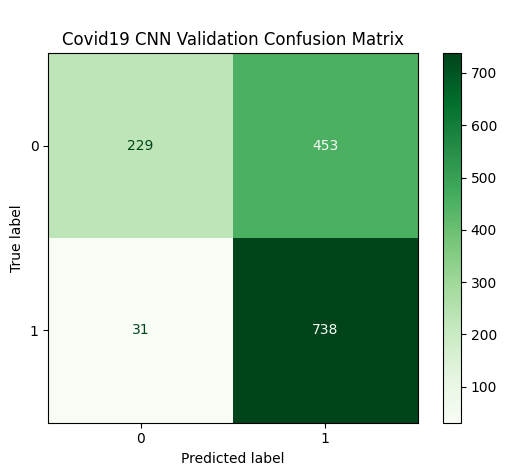

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.31      0.46       670
           1       0.62      0.96      0.75       782

    accuracy                           0.66      1452
   macro avg       0.75      0.64      0.60      1452
weighted avg       0.74      0.66      0.62      1452



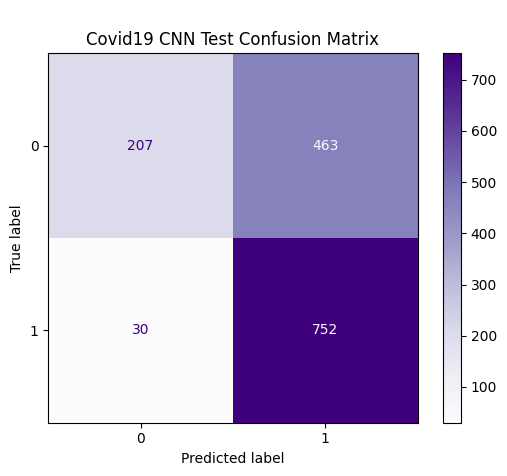

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN 5 Layers Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'relu'

=============== Performance of CNN Activation 'relu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5099 - loss: 0.2496 - val_accuracy: 0.5631 - val_loss: 0.2439
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5856 - loss: 0.2415 - val_accuracy: 0.6147 - val_loss: 0.2317
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6080 - loss: 0.2316 - val_accuracy: 0.6134 - val_loss: 0.2323
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6170 - loss: 0.2288 - val_accuracy: 0.6154 - val_loss: 0.2291
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6490 - loss: 0.2169 - val_accuracy: 0.6713 - val_loss: 0.2110
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6546 - loss: 0.2088 - val_accuracy: 0.6589 - val_loss: 0.2098
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6592 - loss: 0.2094 - val_accuracy: 0.6699 - val_loss: 0.2049
Epoch 8/100
88/88 

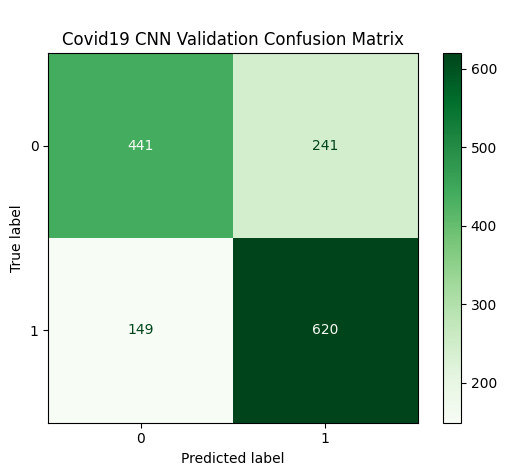

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       670
           1       0.73      0.81      0.77       782

    accuracy                           0.74      1452
   macro avg       0.74      0.73      0.73      1452
weighted avg       0.74      0.74      0.74      1452



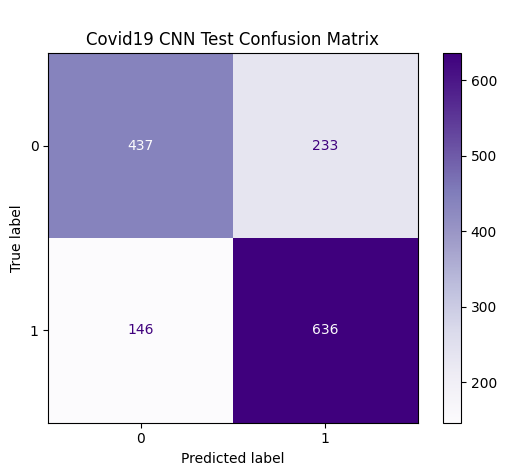

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'relu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Activation 'elu'

=============== Performance of CNN Activation 'elu' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5131 - loss: 0.2489 - val_accuracy: 0.6058 - val_loss: 0.2334
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6047 - loss: 0.2304 - val_accuracy: 0.6161 - val_loss: 0.2272
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6297 - loss: 0.2211 - val_accuracy: 0.6203 - val_loss: 0.2282
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6275 - loss: 0.2224 - val_accuracy: 0.6471 - val_loss: 0.2191
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6613 - loss: 0.2098 - val_accuracy: 0.6747 - val_loss: 0.2091
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6744 - loss: 0.2045 - val_accuracy: 0.6644 - val_loss: 0.2093
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6396 - loss: 0.2212 - val_accuracy: 0.6451 - val_loss: 0.2177
Epoch 8/100
88/88 ━

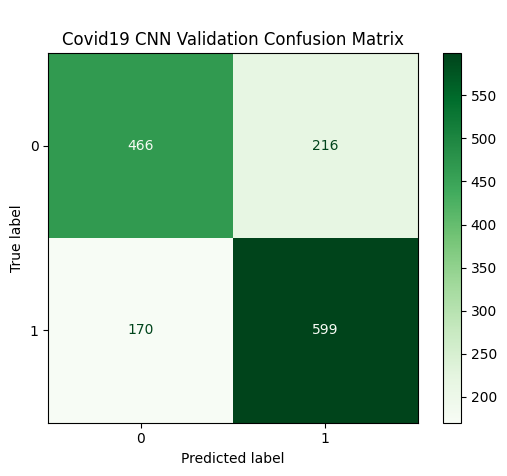

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       670
           1       0.74      0.77      0.76       782

    accuracy                           0.73      1452
   macro avg       0.73      0.73      0.73      1452
weighted avg       0.73      0.73      0.73      1452



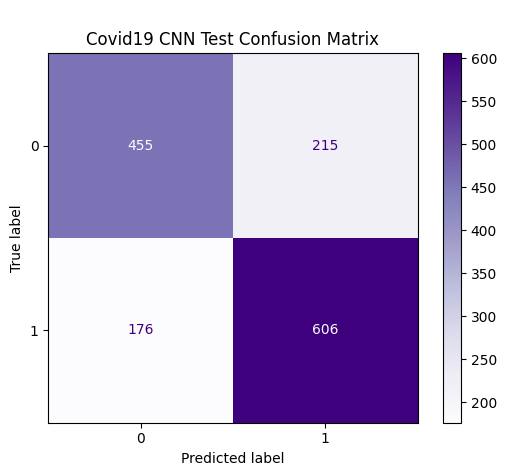

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='elu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(128, activation='elu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Activation 'elu' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'adamW'

=============== Performance of CNN Optimizer 'adamW' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5245 - loss: 0.2492 - val_accuracy: 0.6023 - val_loss: 0.2346
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6095 - loss: 0.2342 - val_accuracy: 0.6161 - val_loss: 0.2240
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6352 - loss: 0.2207 - val_accuracy: 0.6547 - val_loss: 0.2116
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6394 - loss: 0.2211 - val_accuracy: 0.6595 - val_loss: 0.2115
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6585 - loss: 0.2087 - val_accuracy: 0.6182 - val_loss: 0.2283
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6525 - loss: 0.2147 - val_accuracy: 0.6175 - val_loss: 0.2284
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6804 - loss: 0.2046 - val_accuracy: 0.6823 - val_loss: 0.1994
Epoch 8/100
88/88 

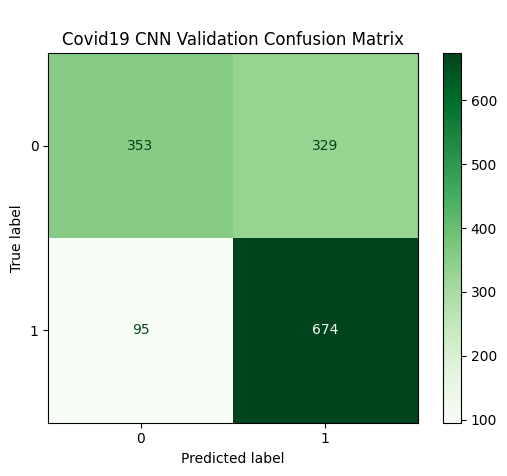

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       670
           1       0.68      0.89      0.77       782

    accuracy                           0.72      1452
   macro avg       0.74      0.70      0.70      1452
weighted avg       0.74      0.72      0.71      1452



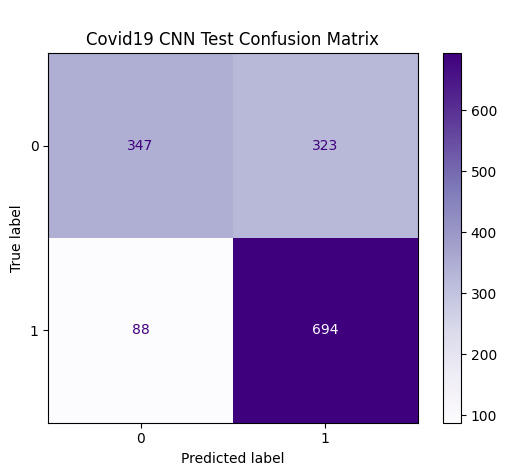

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adamW', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'adamW' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

Optimizer 'rmsprop'

=============== Performance of CNN Optimizer 'rmsprop' Training========================
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5284 - loss: 0.2498 - val_accuracy: 0.5927 - val_loss: 0.2475
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5693 - loss: 0.2461 - val_accuracy: 0.5541 - val_loss: 0.2441
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5789 - loss: 0.2397 - val_accuracy: 0.5996 - val_loss: 0.2351
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6103 - loss: 0.2320 - val_accuracy: 0.5314 - val_loss: 0.2514
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6139 - loss: 0.2288 - val_accuracy: 0.5348 - val_loss: 0.2503
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6259 - loss: 0.2240 - val_accuracy: 0.5445 - val_loss: 0.2576
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6362 - loss: 0.2210 - val_accuracy: 0.4845 - val_loss: 0.3064
Epoch 8/100
88/8

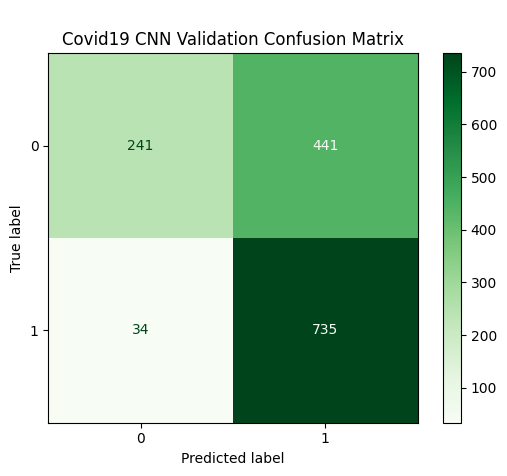

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49       670
           1       0.63      0.96      0.76       782

    accuracy                           0.68      1452
   macro avg       0.76      0.65      0.63      1452
weighted avg       0.75      0.68      0.64      1452



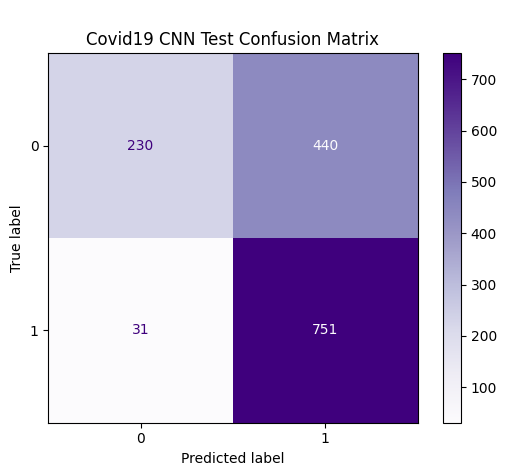

In [ ]:
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=64, kernel_size=7, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
print("=============== Performance of CNN Optimizer 'rmsprop' Training========================")
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=100,batch_size=50)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

1. using 3 different hidden layers (3, 4, 5) and this have the activation (tanh), optimizer (adam).
2. take the best layer of 4 and hypertuning the activation (relu) and (elu).
3. take the best activation 'relu' and hypertuning the optimizers (adamW) and (rmsprop).